<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/Improving_NN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab

To load data from your Google drive, first you need to mount Google drive. First, run the code below. Second, in order to get the authorization code, you should click on the link, choose your Google account, click on 'allow' and copy the code and paste it in the box below and press Enter. Once done it will show you "Mounted at gdrive". You know the Google drive is mounted once you see your folders on the left panel.







In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


# 1) Import 

In [3]:
import tensorflow as tf

In [4]:
# check the version
tf.__version__

'2.12.0'

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Load Data

In [10]:
train_set_x = np.load('/content/gdrive/MyDrive/MNIST/train_set_x.npy')
test_set_x = np.load('/content/gdrive/MyDrive/MNIST/test_set_x.npy')
cv_set_x = np.load('/content/gdrive/MyDrive/MNIST/cv_set_x.npy')

train_set_y = np.load('/content/gdrive/MyDrive/MNIST/train_set_y.npy')
test_set_y = np.load('/content/gdrive/MyDrive/MNIST/test_set_y.npy')
cv_set_y = np.load('/content/gdrive/MyDrive/MNIST/cv_set_y.npy')


In [11]:
print("train X shape: ", train_set_x.shape) # X_train: numpy array with shape: (num_samples_train, num_features)
print("train y shape: ", train_set_y.shape) # y_train: numpy array with shape: (num_samples_train,) 
print("test X shape: ", test_set_x.shape)   # X_test: numpy array with shape: (num_samples_test, num_features)
print("test y shape: ", test_set_y.shape)   # y_test: numpy array with shape: (num_samples_test,)
print("CV y shape: ", cv_set_x.shape) 
print("CV y shape: ", cv_set_y.shape) 

train X shape:  (10038, 784)
train y shape:  (10038,)
test X shape:  (2000, 784)
test y shape:  (2000,)
CV y shape:  (1962, 784)
CV y shape:  (1962,)


The labels are integers from 0 to 9, and each number represents a piece of clothes following the order in labels.

In [12]:
print("minimum train y value: ", min(train_set_y))
print("maximum train y value: ", max(train_set_y))

minimum train y value:  0
maximum train y value:  1


# 3) Build Model (Sequential)

Here, we build a NN model (feed forward) with one or more hidden layers. 

## Examples

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import l2


In [14]:
# Setting the best parameters based on last assignment
n_1=13
alpha=0.0742
learning_rate = alpha 
lambd=0.1
epochs=20
batch_size = 55

# Calling the model

mode20 = Sequential()
mode20.add(Dense(n_1, activation='relu', input_shape=(784,)))
mode20.add(Dense(4, activation='relu'))
mode20.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=learning_rate)

mode20.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history20 = mode20.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=False, validation_split=0.2)
pd.DataFrame(history20.history)

,loss,accuracy,val_loss,val_accuracy
0,0.382624,0.887049,0.341294,0.890438
1,0.259222,0.921046,0.259271,0.915837
2,0.216193,0.932379,0.200564,0.933765
3,0.189007,0.937235,0.218225,0.930279
4,0.173361,0.940847,0.168769,0.936753
5,0.161835,0.944583,0.151079,0.948207
6,0.147329,0.946700,0.147589,0.944223
7,0.146131,0.947945,0.142912,0.948207
8,0.137498,0.948817,0.140937,0.950199
9,0.128619,0.955542,0.131685,0.953187


In [15]:
train_loss, train_accuracy = mode20.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 2s 6ms/step - loss: 0.0879 - accuracy: 0.9699


In [16]:
test_loss, test_accuracy = mode20.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.9460


In [17]:
cv_loss, cv_accuracy = mode20.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 4ms/step - loss: 0.1274 - accuracy: 0.9577


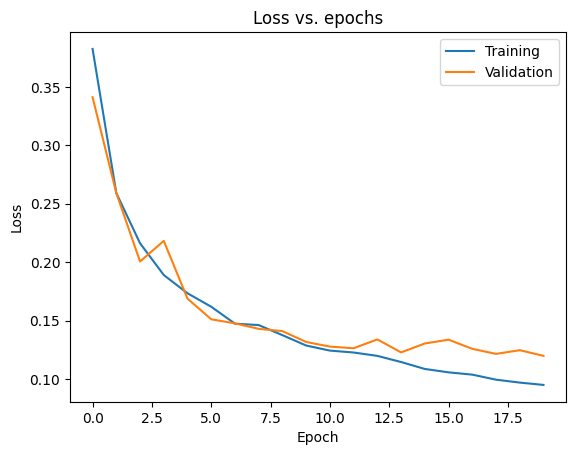

In [18]:
# Creating a data frame to track loss and accuracy
df20 = pd.DataFrame(history20.history)
# Making a plot for the loss based in df
plt.plot(df20['loss'])
plt.plot(df20['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


# Reduce Overfit - Change the NN Model

In [19]:
# Setting the best parameters based on last assignment
n_1=13
alpha=0.0742
learning_rate = alpha 
lambd=0.1
epochs=20
batch_size = 55

# Calling the model

mode20 = Sequential()
mode20.add(Dense(n_1, activation='relu', input_shape=(784,)))
mode20.add(Dense(8, activation='relu'))
mode20.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=learning_rate)

mode20.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history20 = mode20.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=False, validation_split=0.2)
pd.DataFrame(history20.history)

,loss,accuracy,val_loss,val_accuracy
0,0.252753,0.906974,0.207995,0.916833
1,0.188954,0.928767,0.165184,0.935259
2,0.173075,0.934745,0.171005,0.929283
3,0.167923,0.936862,0.169405,0.937749
4,0.155702,0.940598,0.149856,0.940239
5,0.148713,0.942590,0.151335,0.941235
6,0.142915,0.945081,0.142722,0.943725
7,0.140411,0.945205,0.152429,0.942231
8,0.135669,0.946949,0.133967,0.946713
9,0.134350,0.949066,0.141418,0.944223


In [20]:
train_loss, train_accuracy = mode20.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1189 - accuracy: 0.9540


In [21]:
test_loss, test_accuracy = mode20.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9375


In [22]:
cv_loss, cv_accuracy = mode20.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9429


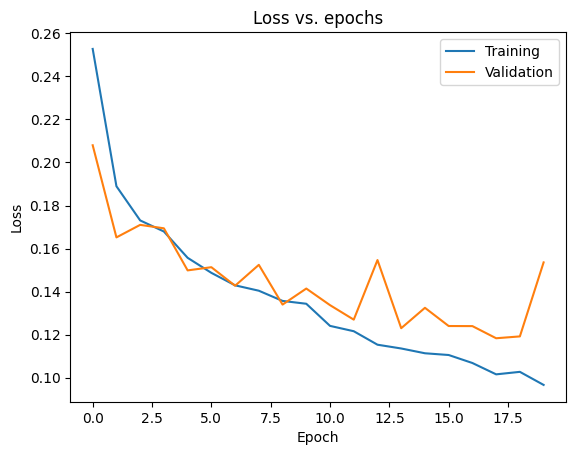

In [23]:
# Creating a data frame to track loss and accuracy
df20 = pd.DataFrame(history20.history)
# Making a plot for the loss based in df
plt.plot(df20['loss'])
plt.plot(df20['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Reduce Overfit - L2 Regularization

Model Regularization

In [24]:
# Setting the best parameters based on last assignment
n_1=13
n_2=8
alpha=0.0742
learning_rate = alpha 
lambd=0.001
epochs=20
batch_size = 55

# Calling the model

mode20 = Sequential()
mode20.add(Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd)))
mode20.add(Dense(n_2, activation='relu', kernel_regularizer=l2(lambd)))
mode20.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd)))

optimizer = SGD(learning_rate=learning_rate)

mode20.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history20 = mode20.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=False,validation_split=0.2)
pd.DataFrame(history20.history)

,loss,accuracy,val_loss,val_accuracy
0,0.327307,0.886550,0.273695,0.906873
1,0.235217,0.923163,0.245985,0.921315
2,0.219908,0.929888,0.207480,0.929781
3,0.205584,0.934745,0.190194,0.937749
4,0.194339,0.941469,0.193907,0.937749
5,0.191773,0.940847,0.197201,0.934761
6,0.187174,0.940598,0.187134,0.939741
7,0.178386,0.945704,0.176138,0.943227
8,0.173792,0.945081,0.167751,0.947709
9,0.168547,0.949191,0.165985,0.947709


In [25]:
train_loss, train_accuracy = mode20.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1406 - accuracy: 0.9604


In [26]:
test_loss, test_accuracy = mode20.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9415


In [27]:
cv_loss, cv_accuracy = mode20.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9521


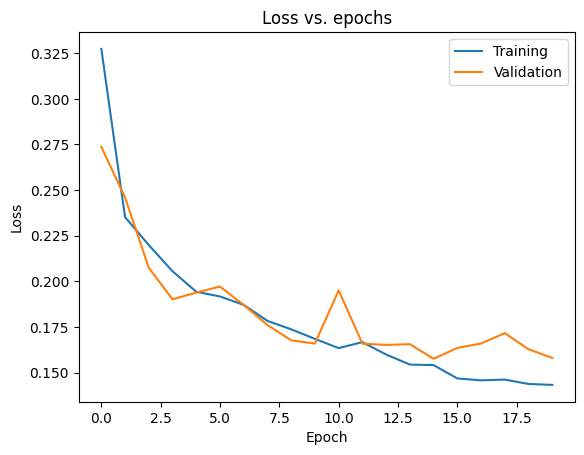

In [28]:
# Creating a data frame to track loss and accuracy
df20 = pd.DataFrame(history20.history)
# Making a plot for the loss based in df
plt.plot(df20['loss'])
plt.plot(df20['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Reduce Overfit - Dropout Regularization

In [29]:
#dropout regularizer
#dropout rate = 1-keep_probability
n_1=13
n_2=8
alpha=0.0742
learning_rate = alpha 
lambd=0.001
epochs=20
batch_size = 55

model = Sequential([
                    Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd)),
                    Dropout(0.5), #dropout rate 
                    Dense(n_2, activation='relu', kernel_regularizer=l2(lambd)),
                    Dropout(0.5), #dropout rate
                    Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd))
                    
])
                    

In [30]:
optimizer = SGD(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=False, validation_split=0.2)
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.567187,0.759527,0.365263,0.916833
1,0.454222,0.836737,0.308354,0.926793
2,0.411630,0.854545,0.300961,0.915837
3,0.392569,0.866750,0.284403,0.915837
4,0.386474,0.864010,0.270290,0.935259
5,0.369851,0.872105,0.273825,0.924801
6,0.364352,0.877460,0.264146,0.926793
7,0.354932,0.880448,0.260013,0.932271
8,0.339914,0.893026,0.273321,0.916833
9,0.336179,0.894770,0.246322,0.935757


In [31]:
train_loss, train_accuracy = model.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.2173 - accuracy: 0.9469


In [32]:
test_loss, test_accuracy = model.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.9295


In [33]:
cv_loss, cv_accuracy = model.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 3ms/step - loss: 0.2441 - accuracy: 0.9455


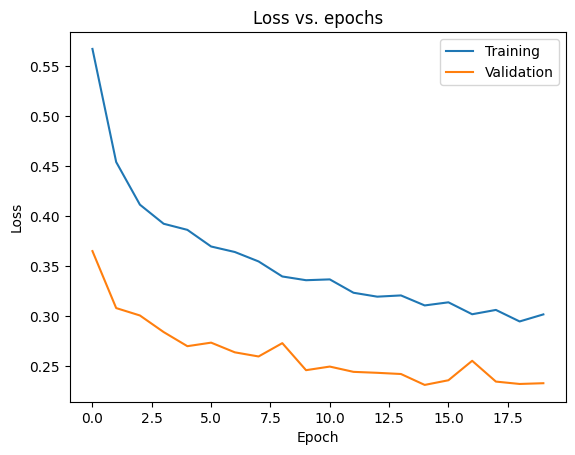

In [34]:
# Creating a data frame to track loss and accuracy
df = pd.DataFrame(history.history)
# Making a plot for the loss based in df
plt.plot(df ['loss'])
plt.plot(df ['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

#  Reduce Overfit - Early Stopping 

Another regularization approach is called early stopping. 
Early stopping is a technique that monitors the performance of the network for every epoch on a held out validation set during the training run, and terminates the training conditional on the validation performance.

In [35]:
# Setting the best parameters based on last assignment
n_1=13
n_2=8
alpha=0.0742
learning_rate = alpha 
lambd=0.001
epochs=20
batch_size = 55

# Calling the model

modelES = Sequential()
modelES.add(Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd)))
modelES.add(Dense(n_2, activation='relu', kernel_regularizer=l2(lambd)))
modelES.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd)))

optimizer = SGD(learning_rate=learning_rate)

modelES.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyES = modelES.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=False)
pd.DataFrame(historyES.history)


,loss,accuracy
0,0.304658,0.896991
1,0.235140,0.923491
2,0.210401,0.935645
3,0.194508,0.939131
4,0.186166,0.943614
5,0.182741,0.943515
6,0.175379,0.946902
7,0.167554,0.947699
8,0.161718,0.951484
9,0.162577,0.950189


In [36]:
# by default, monitor='val_loss', which means that we use the validation loss as the performance measure to decide when to terminate the training.
# we could instead use 'val_accuracy'.
#set early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5) 

# min_delta: Minimum change in the monitored quantity to qualify as an improvement, 
# i.e. an absolute change of less than min_delta, will count as no improvement.
# by default, min_delta=0.

#patience: Number of consecutive epochs with no improvement after which training will be stopped.
# by default, patience is set to zero which terminates training as soon as the performance measure gets worse from one epoch to the next.

In [37]:
# fit the model with validation set  
historyES = modelES.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose = 2, validation_split=0.2,
                    callbacks=[early_stopping])
pd.DataFrame(historyES.history)
# The 0.2 means that 20 percent of the training data will be held back for validation.

Epoch 1/20
146/146 - 1s - loss: 0.1398 - accuracy: 0.9601 - val_loss: 0.1189 - val_accuracy: 0.9691 - 593ms/epoch - 4ms/step
Epoch 2/20
146/146 - 0s - loss: 0.1343 - accuracy: 0.9621 - val_loss: 0.1206 - val_accuracy: 0.9681 - 331ms/epoch - 2ms/step
Epoch 3/20
146/146 - 0s - loss: 0.1321 - accuracy: 0.9615 - val_loss: 0.1712 - val_accuracy: 0.9377 - 332ms/epoch - 2ms/step
Epoch 4/20
146/146 - 0s - loss: 0.1316 - accuracy: 0.9633 - val_loss: 0.1241 - val_accuracy: 0.9626 - 345ms/epoch - 2ms/step
Epoch 5/20
146/146 - 0s - loss: 0.1248 - accuracy: 0.9644 - val_loss: 0.1275 - val_accuracy: 0.9626 - 330ms/epoch - 2ms/step
Epoch 6/20
146/146 - 0s - loss: 0.1237 - accuracy: 0.9645 - val_loss: 0.1239 - val_accuracy: 0.9641 - 358ms/epoch - 2ms/step


,loss,accuracy,val_loss,val_accuracy
0,0.139830,0.960149,0.118898,0.969123
1,0.134328,0.962142,0.120565,0.968127
2,0.132079,0.961519,0.171226,0.937749
3,0.131562,0.963263,0.124111,0.962649
4,0.124760,0.964384,0.127452,0.962649
5,0.123700,0.964508,0.123919,0.964143


In [38]:
train_loss, train_accuracy = modelES.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1186 - accuracy: 0.9675


In [39]:
test_loss, test_accuracy = modelES.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9505


In [40]:
cv_loss, cv_accuracy = modelES.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9602


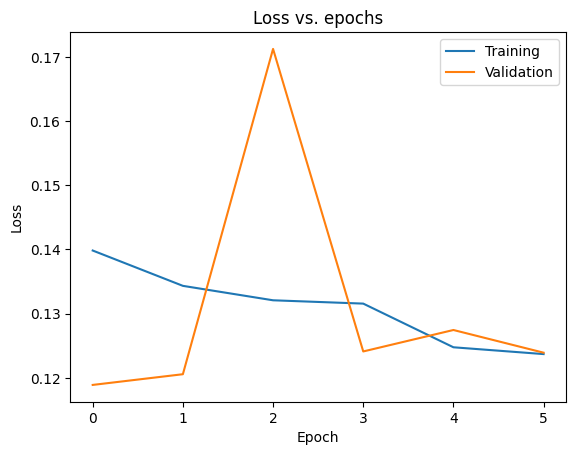

In [41]:
# Creating a data frame to track loss and accuracy
dfES = pd.DataFrame(historyES.history)
# Making a plot for the loss based in df
plt.plot(dfES['loss'])
plt.plot(dfES['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## **Initializing your own weights and biases**


- Weight Initialization1 with dropout

In [42]:
n_1=13
n_2=8
alpha=0.0742
learning_rate = alpha 
lambd=0.001
epochs=20
batch_size = 55

model1 = Sequential([
    Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd), kernel_initializer='random_uniform', bias_initializer='zeros'),
    Dropout(0.5),  # dropout rate
    Dense(n_2, activation='relu', kernel_regularizer=l2(lambd), kernel_initializer='random_uniform', bias_initializer='zeros'),
    Dropout(0.5),  # dropout rate
    Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd), kernel_initializer='he_uniform', bias_initializer='ones')
])
       

In [43]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 13)                10205     
                                                                 
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 dense_19 (Dense)            (None, 8)                 112       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 10,326
Trainable params: 10,326
Non-trainable params: 0
_________________________________________________________________


In [44]:
model1.weights

[<tf.Variable 'dense_18/kernel:0' shape=(784, 13) dtype=float32, numpy=
 array([[-0.01202525, -0.00092525, -0.01837537, ...,  0.0415333 ,
          0.03034225,  0.04832435],
        [ 0.01709887, -0.0152436 ,  0.00473201, ..., -0.03436951,
          0.04997255, -0.03009841],
        [-0.01656049, -0.03265383,  0.01692155, ..., -0.01878973,
         -0.04561834, -0.02280515],
        ...,
        [-0.00270313,  0.00273146, -0.01043027, ...,  0.04123772,
          0.04170977, -0.0388617 ],
        [ 0.03651771,  0.02621421, -0.02461048, ...,  0.01603678,
          0.00657214, -0.03239155],
        [-0.01025625, -0.01740155,  0.00982017, ..., -0.00496215,
         -0.03327737,  0.01635028]], dtype=float32)>,
 <tf.Variable 'dense_18/bias:0' shape=(13,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_19/kernel:0' shape=(13, 8) dtype=float32, numpy=
 array([[ 0.04310615, -0.03987322,  0.03191962, -0.0415126 ,  0.01444347,

In [45]:
model1.add(Dense(n_1, 
                kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05),
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

model1.add(Dense(n_2, 
                kernel_initializer=tf.keras.initializers.HeUniform(seed=None),
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

model1.add(Dense(1, 
                kernel_initializer=tf.keras.initializers.HeUniform(seed=None),
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='sigmoid'))

In [46]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 13)                10205     
                                                                 
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 dense_19 (Dense)            (None, 8)                 112       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
 dense_21 (Dense)            (None, 13)                26        
                                                                 
 dense_22 (Dense)            (None, 8)                

In [47]:
model1.weights

[<tf.Variable 'dense_18/kernel:0' shape=(784, 13) dtype=float32, numpy=
 array([[-0.01202525, -0.00092525, -0.01837537, ...,  0.0415333 ,
          0.03034225,  0.04832435],
        [ 0.01709887, -0.0152436 ,  0.00473201, ..., -0.03436951,
          0.04997255, -0.03009841],
        [-0.01656049, -0.03265383,  0.01692155, ..., -0.01878973,
         -0.04561834, -0.02280515],
        ...,
        [-0.00270313,  0.00273146, -0.01043027, ...,  0.04123772,
          0.04170977, -0.0388617 ],
        [ 0.03651771,  0.02621421, -0.02461048, ...,  0.01603678,
          0.00657214, -0.03239155],
        [-0.01025625, -0.01740155,  0.00982017, ..., -0.00496215,
         -0.03327737,  0.01635028]], dtype=float32)>,
 <tf.Variable 'dense_18/bias:0' shape=(13,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_19/kernel:0' shape=(13, 8) dtype=float32, numpy=
 array([[ 0.04310615, -0.03987322,  0.03191962, -0.0415126 ,  0.01444347,

In [48]:
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [49]:
# fit the model with training set:

history1 = model1.fit(train_set_x, train_set_y, epochs = epochs, batch_size = batch_size, verbose = 2)



Epoch 1/20
183/183 - 1s - loss: 0.7083 - accuracy: 0.5069 - 1s/epoch - 7ms/step
Epoch 2/20
183/183 - 0s - loss: 0.7017 - accuracy: 0.5237 - 329ms/epoch - 2ms/step
Epoch 3/20
183/183 - 0s - loss: 0.5540 - accuracy: 0.7334 - 339ms/epoch - 2ms/step
Epoch 4/20
183/183 - 0s - loss: 0.3417 - accuracy: 0.8730 - 344ms/epoch - 2ms/step
Epoch 5/20
183/183 - 0s - loss: 0.3074 - accuracy: 0.8876 - 336ms/epoch - 2ms/step
Epoch 6/20
183/183 - 0s - loss: 0.2908 - accuracy: 0.8996 - 347ms/epoch - 2ms/step
Epoch 7/20
183/183 - 0s - loss: 0.2861 - accuracy: 0.8992 - 319ms/epoch - 2ms/step
Epoch 8/20
183/183 - 0s - loss: 0.2807 - accuracy: 0.9037 - 341ms/epoch - 2ms/step
Epoch 9/20
183/183 - 0s - loss: 0.2791 - accuracy: 0.9038 - 348ms/epoch - 2ms/step
Epoch 10/20
183/183 - 0s - loss: 0.2694 - accuracy: 0.9060 - 313ms/epoch - 2ms/step
Epoch 11/20
183/183 - 0s - loss: 0.2712 - accuracy: 0.9096 - 335ms/epoch - 2ms/step
Epoch 12/20
183/183 - 0s - loss: 0.2718 - accuracy: 0.9065 - 337ms/epoch - 2ms/step
Epoc

In [50]:
pd.DataFrame(history1.history)

,loss,accuracy
0,0.708347,0.506874
1,0.701658,0.523710
2,0.553999,0.733413
3,0.341745,0.872983
4,0.307361,0.887627
5,0.290832,0.899582
6,0.286118,0.899183
7,0.280733,0.903666
8,0.279142,0.903766
9,0.269358,0.905957


In [51]:
# getting accuracy for training set with weight initialization1
train_loss, train_accuracy = model1.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9427


In [52]:
# Load the history into a pandas Dataframe

df1 = pd.DataFrame(history1.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

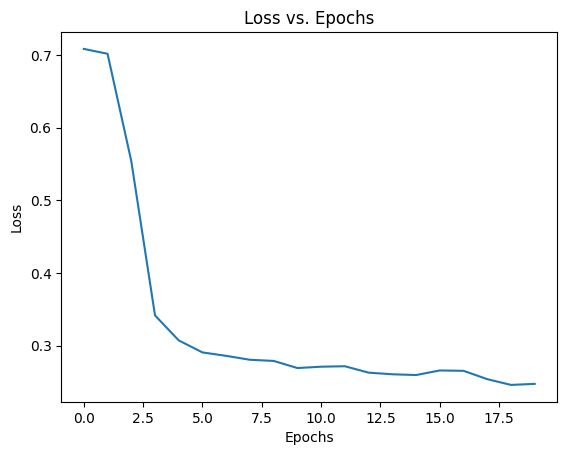

In [53]:
# Make a plot for the loss

loss_plot = df1.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'accuracy')]

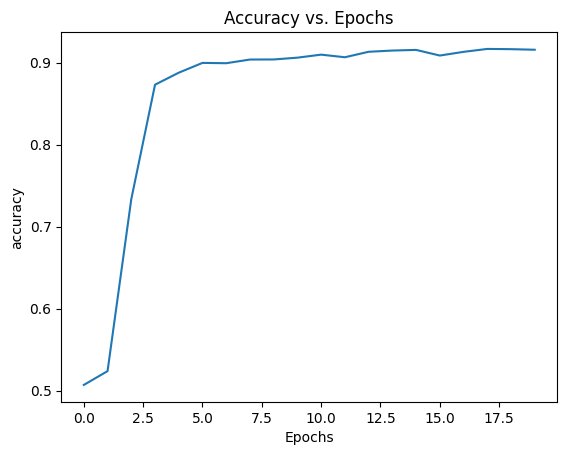

In [54]:
# Make a plot for the accuracy

accuracy_plot = df1.plot(y="accuracy", title = "Accuracy vs. Epochs",legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="accuracy")

 - Weight2 Initialization

In [67]:
n_1=13
n_2=8
alpha=0.0742
learning_rate = alpha 
lambd=0.001
epochs=20
batch_size = 55

model2 = Sequential([
    Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd), kernel_initializer='random_uniform', bias_initializer='zeros'),
    Dropout(0.5),  # dropout rate
    Dense(n_2, activation='relu', kernel_regularizer=l2(lambd), kernel_initializer='random_uniform', bias_initializer='zeros'),
    Dropout(0.5),  # dropout rate
    Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd), kernel_initializer='he_uniform', bias_initializer='ones')
])
       

In [68]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 13)                10205     
                                                                 
 dropout_6 (Dropout)         (None, 13)                0         
                                                                 
 dense_31 (Dense)            (None, 8)                 112       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 10,326
Trainable params: 10,326
Non-trainable params: 0
_________________________________________________________________


In [69]:
model2.weights

[<tf.Variable 'dense_30/kernel:0' shape=(784, 13) dtype=float32, numpy=
 array([[-0.03608296, -0.04290682, -0.00940943, ...,  0.04161086,
         -0.01315588,  0.01979002],
        [-0.0164096 ,  0.01846557, -0.0318744 , ..., -0.01936606,
         -0.00010156, -0.04045199],
        [ 0.01982745,  0.02853337, -0.0298066 , ...,  0.00189114,
          0.01870942, -0.01489828],
        ...,
        [ 0.02443739, -0.03562902,  0.03601085, ...,  0.04582563,
         -0.01207064,  0.03123603],
        [-0.01062517,  0.03367067, -0.02867921, ..., -0.01771434,
         -0.03986082, -0.04093428],
        [-0.03271334, -0.01710869,  0.03908717, ..., -0.01247491,
         -0.02470681,  0.00057817]], dtype=float32)>,
 <tf.Variable 'dense_30/bias:0' shape=(13,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_31/kernel:0' shape=(13, 8) dtype=float32, numpy=
 array([[-0.02216715,  0.0269548 ,  0.01869208,  0.04829036, -0.03695865,

In [70]:
# n1--random normal, n2--GlorotUniform, n3-- HEUniform

model2.add(Dense(n_1, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

model2.add(Dense(n_2, 
                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=None),
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

model2.add(Dense(1, 
                kernel_initializer=tf.keras.initializers.HeUniform(seed=None),
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='sigmoid'))

In [71]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 13)                10205     
                                                                 
 dropout_6 (Dropout)         (None, 13)                0         
                                                                 
 dense_31 (Dense)            (None, 8)                 112       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
 dense_33 (Dense)            (None, 13)                26        
                                                                 
 dense_34 (Dense)            (None, 8)                

In [72]:
model2.weights

[<tf.Variable 'dense_30/kernel:0' shape=(784, 13) dtype=float32, numpy=
 array([[-0.03608296, -0.04290682, -0.00940943, ...,  0.04161086,
         -0.01315588,  0.01979002],
        [-0.0164096 ,  0.01846557, -0.0318744 , ..., -0.01936606,
         -0.00010156, -0.04045199],
        [ 0.01982745,  0.02853337, -0.0298066 , ...,  0.00189114,
          0.01870942, -0.01489828],
        ...,
        [ 0.02443739, -0.03562902,  0.03601085, ...,  0.04582563,
         -0.01207064,  0.03123603],
        [-0.01062517,  0.03367067, -0.02867921, ..., -0.01771434,
         -0.03986082, -0.04093428],
        [-0.03271334, -0.01710869,  0.03908717, ..., -0.01247491,
         -0.02470681,  0.00057817]], dtype=float32)>,
 <tf.Variable 'dense_30/bias:0' shape=(13,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_31/kernel:0' shape=(13, 8) dtype=float32, numpy=
 array([[-0.02216715,  0.0269548 ,  0.01869208,  0.04829036, -0.03695865,

In [73]:
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [74]:
# fit the model with training set:

history2 = model2.fit(train_set_x, train_set_y, epochs = epochs, batch_size = batch_size, verbose = 2)



Epoch 1/20
183/183 - 1s - loss: 0.7045 - accuracy: 0.5024 - 992ms/epoch - 5ms/step
Epoch 2/20
183/183 - 0s - loss: 0.7041 - accuracy: 0.4950 - 364ms/epoch - 2ms/step
Epoch 3/20
183/183 - 0s - loss: 0.7032 - accuracy: 0.4952 - 344ms/epoch - 2ms/step
Epoch 4/20
183/183 - 0s - loss: 0.7030 - accuracy: 0.4962 - 339ms/epoch - 2ms/step
Epoch 5/20
183/183 - 0s - loss: 0.7023 - accuracy: 0.4976 - 350ms/epoch - 2ms/step
Epoch 6/20
183/183 - 0s - loss: 0.7018 - accuracy: 0.4981 - 340ms/epoch - 2ms/step
Epoch 7/20
183/183 - 0s - loss: 0.7013 - accuracy: 0.4981 - 322ms/epoch - 2ms/step
Epoch 8/20
183/183 - 0s - loss: 0.7007 - accuracy: 0.5082 - 351ms/epoch - 2ms/step
Epoch 9/20
183/183 - 0s - loss: 0.6989 - accuracy: 0.5223 - 351ms/epoch - 2ms/step
Epoch 10/20
183/183 - 0s - loss: 0.6274 - accuracy: 0.7184 - 495ms/epoch - 3ms/step
Epoch 11/20
183/183 - 0s - loss: 0.3729 - accuracy: 0.8593 - 469ms/epoch - 3ms/step
Epoch 12/20
183/183 - 0s - loss: 0.3117 - accuracy: 0.8776 - 478ms/epoch - 3ms/step
E

In [75]:
pd.DataFrame(history2.history)

,loss,accuracy
0,0.704489,0.502391
1,0.704054,0.495019
2,0.703237,0.495218
3,0.703010,0.496214
4,0.702287,0.497609
5,0.701826,0.498107
6,0.701302,0.498107
7,0.700671,0.508169
8,0.698878,0.522315
9,0.627390,0.718370


In [76]:
train_loss, train_accuracy = model2.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1633 - accuracy: 0.9470


In [77]:
# Load the history into a pandas Dataframe

df2 = pd.DataFrame(history2.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

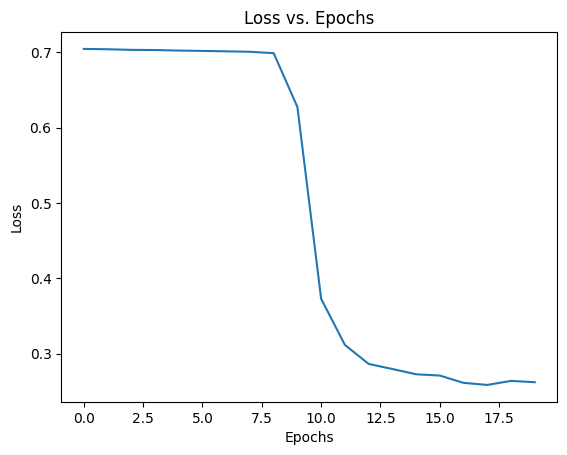

In [78]:
# Make a plot for the loss

loss_plot = df2.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 24.0, 'Epochs'), Text(24.000000000000007, 0.5, 'Accuracy')]

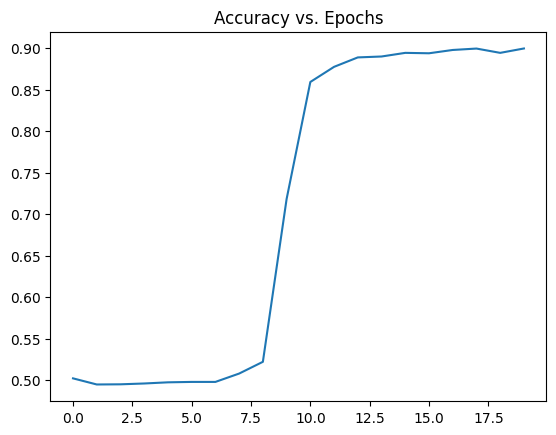

In [79]:
# Make a plot for the accuracy

accuracy_plot = df2.plot(y="accuracy", title = "Accuracy vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Accuracy")

- Weight Initializer 3:

In [89]:
n_1=13
n_2=8
alpha=0.0742
learning_rate = alpha 
lambd=0.001
epochs=20
batch_size = 55

model3 = Sequential([
    Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd), kernel_initializer='random_uniform', bias_initializer='zeros'),
    Dropout(0.5),  # dropout rate
    Dense(n_2, activation='relu', kernel_regularizer=l2(lambd), kernel_initializer='random_uniform', bias_initializer='zeros'),
    Dropout(0.5),  # dropout rate
    Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd), kernel_initializer='he_uniform', bias_initializer='ones')
])
       

In [90]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 13)                10205     
                                                                 
 dropout_10 (Dropout)        (None, 13)                0         
                                                                 
 dense_43 (Dense)            (None, 8)                 112       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
Total params: 10,326
Trainable params: 10,326
Non-trainable params: 0
_________________________________________________________________


In [91]:
model3.weights

[<tf.Variable 'dense_42/kernel:0' shape=(784, 13) dtype=float32, numpy=
 array([[ 0.01737371,  0.0061218 ,  0.04859341, ..., -0.01867741,
          0.04484082,  0.00571246],
        [-0.01123733,  0.00815214, -0.02500587, ..., -0.03968338,
         -0.00237912, -0.03695844],
        [ 0.01409732, -0.04312109,  0.02683321, ..., -0.03800492,
          0.03380842, -0.0248717 ],
        ...,
        [ 0.03695318,  0.02037151,  0.03905668, ...,  0.01905257,
          0.04421575, -0.0185179 ],
        [-0.00754742,  0.0061629 ,  0.00270658, ...,  0.01821423,
          0.01758769, -0.00623292],
        [ 0.02721176, -0.01632397, -0.02635431, ...,  0.03500483,
         -0.01173985, -0.03047015]], dtype=float32)>,
 <tf.Variable 'dense_42/bias:0' shape=(13,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_43/kernel:0' shape=(13, 8) dtype=float32, numpy=
 array([[ 0.03014772,  0.04538945,  0.04479679, -0.02000053, -0.04746497,

In [92]:
# n1--he normal, n2--GlorotNormal, n3-- randomUniform


model3.add(Dense(n_1, 
                kernel_initializer=tf.keras.initializers.HeNormal(),
                bias_initializer=tf.keras.initializers.Constant(value=0.05), 
                activation='relu'))

model3.add(Dense(n_2, 
                kernel_initializer=tf.keras.initializers.GlorotNormal(seed=1),
                bias_initializer=tf.keras.initializers.Constant(value=0.05), 
                activation='relu'))

model3.add(Dense(1, 
                kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.025, maxval=0.025, seed=1),
                bias_initializer=tf.keras.initializers.Constant(value=0.05), 
                activation='sigmoid'))


In [93]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 13)                10205     
                                                                 
 dropout_10 (Dropout)        (None, 13)                0         
                                                                 
 dense_43 (Dense)            (None, 8)                 112       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_44 (Dense)            (None, 1)                 9         
                                                                 
 dense_45 (Dense)            (None, 13)                26        
                                                                 
 dense_46 (Dense)            (None, 8)               

In [94]:
model3.weights

[<tf.Variable 'dense_42/kernel:0' shape=(784, 13) dtype=float32, numpy=
 array([[ 0.01737371,  0.0061218 ,  0.04859341, ..., -0.01867741,
          0.04484082,  0.00571246],
        [-0.01123733,  0.00815214, -0.02500587, ..., -0.03968338,
         -0.00237912, -0.03695844],
        [ 0.01409732, -0.04312109,  0.02683321, ..., -0.03800492,
          0.03380842, -0.0248717 ],
        ...,
        [ 0.03695318,  0.02037151,  0.03905668, ...,  0.01905257,
          0.04421575, -0.0185179 ],
        [-0.00754742,  0.0061629 ,  0.00270658, ...,  0.01821423,
          0.01758769, -0.00623292],
        [ 0.02721176, -0.01632397, -0.02635431, ...,  0.03500483,
         -0.01173985, -0.03047015]], dtype=float32)>,
 <tf.Variable 'dense_42/bias:0' shape=(13,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_43/kernel:0' shape=(13, 8) dtype=float32, numpy=
 array([[ 0.03014772,  0.04538945,  0.04479679, -0.02000053, -0.04746497,

In [95]:
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [96]:
# fit the model with training set:

history3 = model3.fit(train_set_x, train_set_y, epochs = epochs, batch_size = batch_size, verbose = 2)



Epoch 1/20
183/183 - 1s - loss: 0.7042 - accuracy: 0.4974 - 970ms/epoch - 5ms/step
Epoch 2/20
183/183 - 0s - loss: 0.7035 - accuracy: 0.5015 - 366ms/epoch - 2ms/step
Epoch 3/20
183/183 - 0s - loss: 0.7031 - accuracy: 0.4989 - 334ms/epoch - 2ms/step
Epoch 4/20
183/183 - 0s - loss: 0.7024 - accuracy: 0.5068 - 343ms/epoch - 2ms/step
Epoch 5/20
183/183 - 0s - loss: 0.7020 - accuracy: 0.4968 - 327ms/epoch - 2ms/step
Epoch 6/20
183/183 - 0s - loss: 0.7013 - accuracy: 0.5131 - 333ms/epoch - 2ms/step
Epoch 7/20
183/183 - 0s - loss: 0.6980 - accuracy: 0.5531 - 339ms/epoch - 2ms/step
Epoch 8/20
183/183 - 0s - loss: 0.6250 - accuracy: 0.7112 - 484ms/epoch - 3ms/step
Epoch 9/20
183/183 - 1s - loss: 0.4018 - accuracy: 0.8649 - 510ms/epoch - 3ms/step
Epoch 10/20
183/183 - 1s - loss: 0.3243 - accuracy: 0.8856 - 534ms/epoch - 3ms/step
Epoch 11/20
183/183 - 1s - loss: 0.2821 - accuracy: 0.8974 - 550ms/epoch - 3ms/step
Epoch 12/20
183/183 - 1s - loss: 0.2682 - accuracy: 0.9030 - 508ms/epoch - 3ms/step
E

In [97]:
train_loss, train_accuracy = model3.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9455


In [98]:
# Load the history into a pandas Dataframe

df3 = pd.DataFrame(history3.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

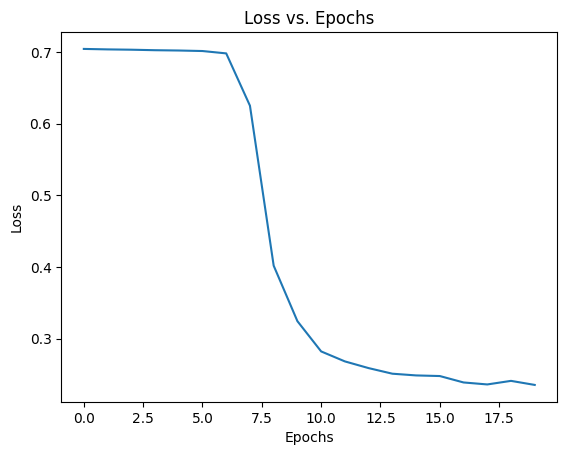

In [99]:
# Make a plot for the loss

loss_plot = df3.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0.5, 24.0, 'Epochs'), Text(24.000000000000007, 0.5, 'Accuracy')]

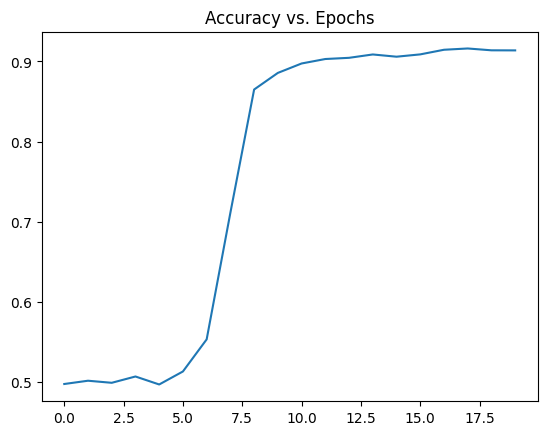

In [100]:
# Make a plot for the accuracy

accuracy_plot = df3.plot(y="accuracy", title = "Accuracy vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Accuracy")

### **Model with Batch Normalization**

In [101]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

- batch 1 (default)

In [102]:
n_1=13
n_2=8
alpha=0.0742
learning_rate = alpha 
lambd=0.001
epochs=20
batch_size = 55

modelb1 = Sequential([
    Dense(n_1, input_shape=(784,), activation="relu"),
    BatchNormalization(),  # <- Batch normalization layer 1
    Dropout(0.5),
    Dense(n_2, activation='relu'),
    BatchNormalization(),  # <- Batch normalization layer 3
    Dropout(.5),
    Dense(1, activation='sigmoid')
])

In [103]:
optimizer = SGD(learning_rate=learning_rate)

modelb1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyb1 = modelb1.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)
pd.DataFrame(historyb1.history)

Epoch 1/20
146/146 - 2s - loss: 0.3961 - accuracy: 0.8223 - val_loss: 0.3118 - val_accuracy: 0.9074 - 2s/epoch - 13ms/step
Epoch 2/20
146/146 - 1s - loss: 0.3267 - accuracy: 0.8649 - val_loss: 0.2030 - val_accuracy: 0.9293 - 516ms/epoch - 4ms/step
Epoch 3/20
146/146 - 1s - loss: 0.3075 - accuracy: 0.8702 - val_loss: 0.1695 - val_accuracy: 0.9412 - 515ms/epoch - 4ms/step
Epoch 4/20
146/146 - 0s - loss: 0.2968 - accuracy: 0.8737 - val_loss: 0.1686 - val_accuracy: 0.9363 - 362ms/epoch - 2ms/step
Epoch 5/20
146/146 - 0s - loss: 0.2841 - accuracy: 0.8831 - val_loss: 0.1890 - val_accuracy: 0.9293 - 349ms/epoch - 2ms/step
Epoch 6/20
146/146 - 0s - loss: 0.2802 - accuracy: 0.8878 - val_loss: 0.1938 - val_accuracy: 0.9283 - 351ms/epoch - 2ms/step
Epoch 7/20
146/146 - 0s - loss: 0.2681 - accuracy: 0.8863 - val_loss: 0.1608 - val_accuracy: 0.9397 - 348ms/epoch - 2ms/step
Epoch 8/20
146/146 - 0s - loss: 0.2738 - accuracy: 0.8883 - val_loss: 0.1836 - val_accuracy: 0.9298 - 344ms/epoch - 2ms/step
Ep

,loss,accuracy,val_loss,val_accuracy
0,0.396133,0.822291,0.311753,0.907371
1,0.326699,0.864882,0.203034,0.929283
2,0.307532,0.870237,0.169452,0.941235
3,0.296850,0.873724,0.168598,0.936255
4,0.284077,0.883063,0.188983,0.929283
5,0.280161,0.887796,0.193765,0.928287
6,0.268056,0.886301,0.160787,0.939741
7,0.273759,0.888294,0.183620,0.929781
8,0.267294,0.889539,0.214397,0.921813
9,0.267015,0.887173,0.166153,0.937251


In [104]:
modelb1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 13)                10205     
                                                                 
 batch_normalization (BatchN  (None, 13)               52        
 ormalization)                                                   
                                                                 
 dropout_12 (Dropout)        (None, 13)                0         
                                                                 
 dense_49 (Dense)            (None, 8)                 112       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 8)               

In [ ]:
train_loss, train_accuracy = modelb1.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1208 - accuracy: 0.9541


In [ ]:
test_loss, test_accuaracy = modelb1.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9340


In [ ]:
cv_loss, cv_accuracy = modelb1.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9490


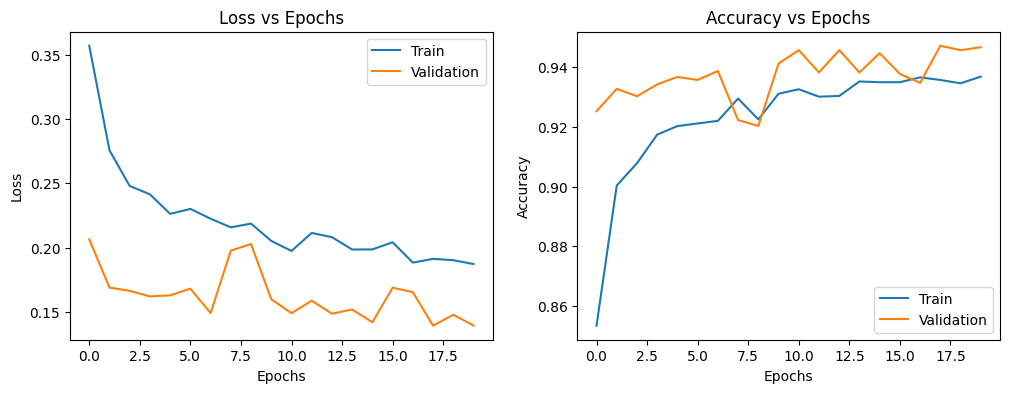

In [ ]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(historyb1.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['accuracy'], label="Train")
ax.plot(epochs, frame['val_accuracy'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()

- batch 2

In [ ]:
n_1 = 13
n_2 = 8
alpha = 0.0742
learning_rate = alpha
lambd = 0.001
epochs = 20
batch_size = 55

modelb2 = Sequential()
modelb2.add(Dense(n_1, input_shape=(784,), activation="relu"))
modelb2.add(BatchNormalization(momentum=0.95, epsilon=0.005, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb2.add(Dropout(.5))
modelb2.add(Dense(n_2, activation='relu'))
modelb2.add(BatchNormalization(momentum=0.95, epsilon=0.005, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb2.add(Dropout(.5))
modelb2.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=learning_rate)


In [ ]:
modelb2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyb2 = modelb2.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)

Epoch 1/20
146/146 - 1s - loss: 0.3777 - accuracy: 0.8413 - val_loss: 0.1911 - val_accuracy: 0.9298 - 1s/epoch - 8ms/step
Epoch 2/20
146/146 - 0s - loss: 0.2863 - accuracy: 0.8938 - val_loss: 0.1731 - val_accuracy: 0.9338 - 366ms/epoch - 3ms/step
Epoch 3/20
146/146 - 0s - loss: 0.2616 - accuracy: 0.9022 - val_loss: 0.1615 - val_accuracy: 0.9382 - 338ms/epoch - 2ms/step
Epoch 4/20
146/146 - 0s - loss: 0.2659 - accuracy: 0.9032 - val_loss: 0.1562 - val_accuracy: 0.9353 - 323ms/epoch - 2ms/step
Epoch 5/20
146/146 - 0s - loss: 0.2330 - accuracy: 0.9225 - val_loss: 0.2616 - val_accuracy: 0.8939 - 363ms/epoch - 2ms/step
Epoch 6/20
146/146 - 0s - loss: 0.2296 - accuracy: 0.9213 - val_loss: 0.1504 - val_accuracy: 0.9412 - 430ms/epoch - 3ms/step
Epoch 7/20
146/146 - 0s - loss: 0.2209 - accuracy: 0.9263 - val_loss: 0.1535 - val_accuracy: 0.9442 - 476ms/epoch - 3ms/step
Epoch 8/20
146/146 - 0s - loss: 0.2172 - accuracy: 0.9250 - val_loss: 0.1504 - val_accuracy: 0.9427 - 462ms/epoch - 3ms/step
Epo

In [ ]:
# Print the model summary

modelb2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 13)                10205     
                                                                 
 batch_normalization_2 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 13)                0         
                                                                 
 dense_33 (Dense)            (None, 8)                 112       
                                                                 
 batch_normalization_3 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 8)                

In [ ]:
pd.DataFrame(historyb2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.377655,0.841345,0.191137,0.929781
1,0.286259,0.893773,0.173143,0.933765
2,0.261613,0.902242,0.161501,0.938247
3,0.265937,0.903238,0.156240,0.935259
4,0.232997,0.922540,0.261582,0.893924
5,0.229561,0.921295,0.150437,0.941235
6,0.220930,0.926276,0.153474,0.944223
7,0.217176,0.925031,0.150394,0.942729
8,0.223415,0.921793,0.144224,0.947709
9,0.213126,0.928144,0.161804,0.936255


In [ ]:
train_loss, train_mae = modelb2.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1238 - accuracy: 0.9518


In [ ]:
test_loss, test_mae = modelb2.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1238 - accuracy: 0.9518


In [ ]:
cv_loss, cv_mae = modelb2.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.9475


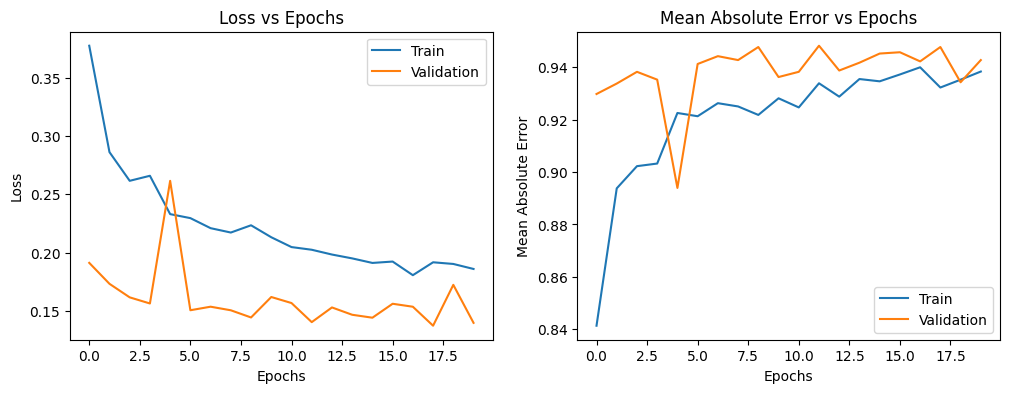

In [ ]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(historyb2.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['accuracy'], label="Train")
ax.plot(epochs, frame['val_accuracy'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

- batch 3

In [ ]:
n_1 = 13
n_2 = 8
alpha = 0.0742
learning_rate = alpha
lambd = 0.001
epochs = 20
batch_size = 55

modelb3 = Sequential()
modelb3.add(Dense(n_1, input_shape=(784,), activation="relu"))
modelb3.add(BatchNormalization(momentum=0.85, epsilon=0.025,axis=-1,  beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb3.add(Dropout(.5))
modelb3.add(Dense(n_2, activation='relu'))
modelb3.add(BatchNormalization(momentum=0.85, epsilon=0.025, axis=-1, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb3.add(Dropout(.5))
modelb3.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=learning_rate)


In [ ]:
modelb3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyb3 = modelb3.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)



Epoch 1/20
146/146 - 1s - loss: 0.3984 - accuracy: 0.8316 - val_loss: 0.2260 - val_accuracy: 0.9228 - 1s/epoch - 8ms/step
Epoch 2/20
146/146 - 0s - loss: 0.2875 - accuracy: 0.8961 - val_loss: 0.1853 - val_accuracy: 0.9333 - 338ms/epoch - 2ms/step
Epoch 3/20
146/146 - 0s - loss: 0.2608 - accuracy: 0.9098 - val_loss: 0.1851 - val_accuracy: 0.9343 - 324ms/epoch - 2ms/step
Epoch 4/20
146/146 - 0s - loss: 0.2465 - accuracy: 0.9183 - val_loss: 0.1671 - val_accuracy: 0.9363 - 334ms/epoch - 2ms/step
Epoch 5/20
146/146 - 0s - loss: 0.2424 - accuracy: 0.9179 - val_loss: 0.2011 - val_accuracy: 0.9208 - 317ms/epoch - 2ms/step
Epoch 6/20
146/146 - 0s - loss: 0.2322 - accuracy: 0.9234 - val_loss: 0.1744 - val_accuracy: 0.9333 - 323ms/epoch - 2ms/step
Epoch 7/20
146/146 - 0s - loss: 0.2221 - accuracy: 0.9210 - val_loss: 0.1593 - val_accuracy: 0.9407 - 330ms/epoch - 2ms/step
Epoch 8/20
146/146 - 0s - loss: 0.2273 - accuracy: 0.9263 - val_loss: 0.1650 - val_accuracy: 0.9377 - 352ms/epoch - 2ms/step
Epo

In [ ]:
# Print the model summary

modelb3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 13)                10205     
                                                                 
 batch_normalization_4 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 13)                0         
                                                                 
 dense_36 (Dense)            (None, 8)                 112       
                                                                 
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 8)               

In [ ]:
pd.DataFrame(historyb3.history)

,loss,accuracy,val_loss,val_accuracy
0,0.398380,0.831631,0.226026,0.922809
1,0.287456,0.896140,0.185290,0.933267
2,0.260820,0.909838,0.185052,0.934263
3,0.246502,0.918306,0.167125,0.936255
4,0.242378,0.917933,0.201123,0.920817
5,0.232175,0.923412,0.174420,0.933267
6,0.222119,0.921046,0.159348,0.940737
7,0.227322,0.926276,0.164988,0.937749
8,0.220868,0.925654,0.164730,0.938247
9,0.203550,0.931631,0.156347,0.942729


In [ ]:
train_loss, train_mae = modelb3.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.9529


In [ ]:
test_loss, test_mae = modelb3.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1912 - accuracy: 0.9315


In [ ]:
cv_loss, cv_mae = modelb3.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9439


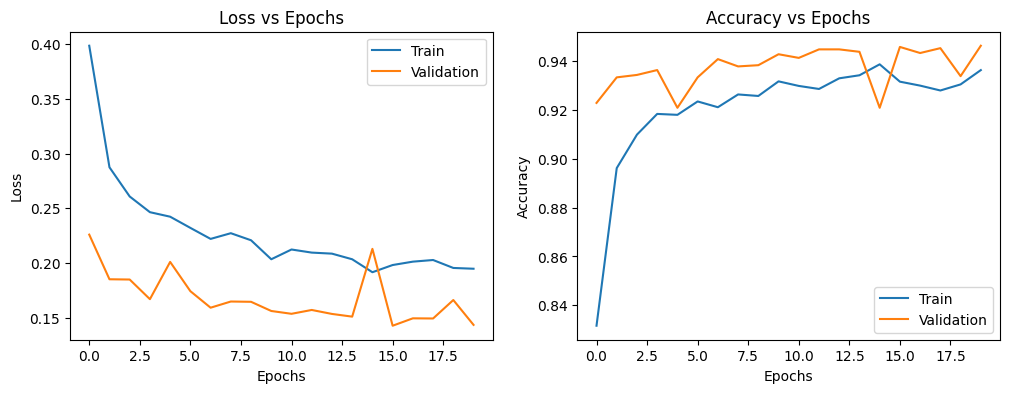

In [ ]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(historyb3.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['accuracy'], label="Train")
ax.plot(epochs, frame['val_accuracy'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()

- batch 4

In [ ]:
n_1 = 13
n_2 = 8
alpha = 0.0742
learning_rate = alpha
lambd = 0.001
epochs = 20
batch_size = 55

modelb4 = Sequential()
modelb4.add(Dense(n_1, input_shape=(784,), activation="relu"))
modelb4.add(BatchNormalization(momentum=0.55, epsilon=0.0075,axis=1,  beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb4.add(Dropout(.5))
modelb4.add(Dense(n_2, activation='relu'))
modelb4.add(BatchNormalization(momentum=0.55, epsilon=0.0075, axis=1, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb4.add(Dropout(.5))
modelb4.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=learning_rate)


In [ ]:
# Print the model summary

modelb4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 13)                10205     
                                                                 
 batch_normalization_6 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dropout_14 (Dropout)        (None, 13)                0         
                                                                 
 dense_39 (Dense)            (None, 8)                 112       
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 8)               

In [ ]:
from tensorflow.keras.optimizers import SGD
modelb4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyb4 = modelb4.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)
pd.DataFrame(historyb4.history)

Epoch 1/20
146/146 - 1s - loss: 0.3674 - accuracy: 0.8528 - val_loss: 0.1987 - val_accuracy: 0.9233 - 1s/epoch - 10ms/step
Epoch 2/20
146/146 - 0s - loss: 0.2786 - accuracy: 0.8948 - val_loss: 0.1816 - val_accuracy: 0.9293 - 335ms/epoch - 2ms/step
Epoch 3/20
146/146 - 0s - loss: 0.2626 - accuracy: 0.9054 - val_loss: 0.1993 - val_accuracy: 0.9223 - 319ms/epoch - 2ms/step
Epoch 4/20
146/146 - 0s - loss: 0.2482 - accuracy: 0.9121 - val_loss: 0.1661 - val_accuracy: 0.9353 - 323ms/epoch - 2ms/step
Epoch 5/20
146/146 - 0s - loss: 0.2424 - accuracy: 0.9188 - val_loss: 0.1749 - val_accuracy: 0.9283 - 342ms/epoch - 2ms/step
Epoch 6/20
146/146 - 0s - loss: 0.2290 - accuracy: 0.9213 - val_loss: 0.1551 - val_accuracy: 0.9392 - 326ms/epoch - 2ms/step
Epoch 7/20
146/146 - 0s - loss: 0.2182 - accuracy: 0.9281 - val_loss: 0.1472 - val_accuracy: 0.9427 - 334ms/epoch - 2ms/step
Epoch 8/20
146/146 - 0s - loss: 0.2241 - accuracy: 0.9254 - val_loss: 0.1547 - val_accuracy: 0.9392 - 321ms/epoch - 2ms/step
Ep

,loss,accuracy,val_loss,val_accuracy
0,0.367441,0.852802,0.198652,0.923307
1,0.278629,0.894770,0.181650,0.929283
2,0.262552,0.905355,0.199302,0.922311
3,0.248228,0.912080,0.166060,0.935259
4,0.242432,0.918804,0.174878,0.928287
5,0.228966,0.921295,0.155138,0.939243
6,0.218175,0.928144,0.147223,0.942729
7,0.224143,0.925405,0.154670,0.939243
8,0.210897,0.929390,0.155789,0.937251
9,0.207228,0.933998,0.137734,0.945717


In [ ]:
train_loss, train_mae = modelb4.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9479


In [ ]:
test_loss, test_mae = modelb4.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 1ms/step - loss: 0.1933 - accuracy: 0.9305


In [ ]:
cv_loss, cv_mae = modelb4.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9414


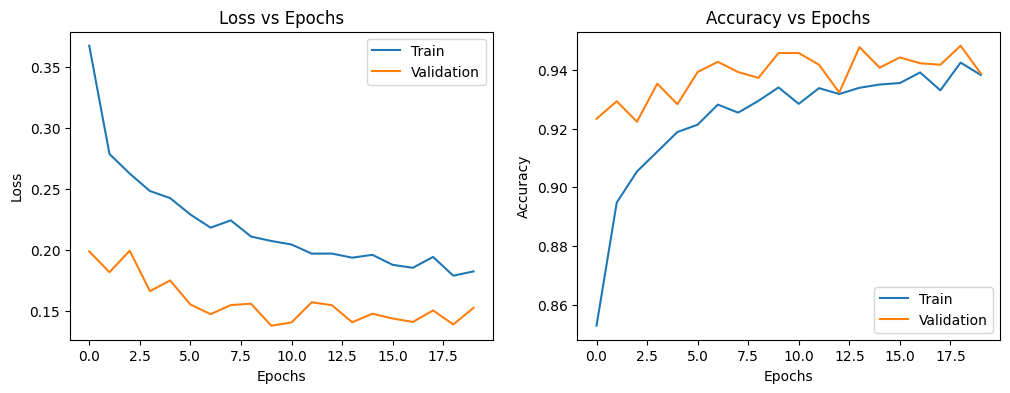

In [ ]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(historyb4.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['accuracy'], label="Train")
ax.plot(epochs, frame['val_accuracy'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()

- batch 5

In [ ]:
n_1 = 13
n_2 = 8
alpha = 0.0742
learning_rate = alpha
lambd = 0.001
epochs = 20
batch_size = 55

modelb5 = Sequential()
modelb5.add(Dense(n_1, input_shape=(784,), activation="relu"))
modelb5.add(BatchNormalization(momentum=0.55, epsilon=0.0075,axis=-1,  beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb5.add(Dropout(.5))
modelb5.add(Dense(n_2, activation='relu'))
modelb5.add(BatchNormalization(momentum=0.55, epsilon=0.0075, axis=-1, beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), gamma_initializer=tf.keras.initializers.Constant(value=0.9)))
modelb5.add(Dropout(.5))
modelb5.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=learning_rate)


In [ ]:
# Print the model summary

modelb5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 13)                10205     
                                                                 
 batch_normalization_8 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dropout_16 (Dropout)        (None, 13)                0         
                                                                 
 dense_42 (Dense)            (None, 8)                 112       
                                                                 
 batch_normalization_9 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_17 (Dropout)        (None, 8)               

In [ ]:
modelb5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyb5 = modelb5.fit(train_set_x, train_set_y , batch_size=batch_size, epochs=epochs, verbose=2, validation_split=0.2)
pd.DataFrame(historyb5.history)

Epoch 1/20
146/146 - 1s - loss: 0.3839 - accuracy: 0.8323 - val_loss: 0.1875 - val_accuracy: 0.9333 - 1s/epoch - 9ms/step
Epoch 2/20
146/146 - 0s - loss: 0.2769 - accuracy: 0.8979 - val_loss: 0.1663 - val_accuracy: 0.9382 - 358ms/epoch - 2ms/step
Epoch 3/20
146/146 - 0s - loss: 0.2536 - accuracy: 0.9098 - val_loss: 0.1599 - val_accuracy: 0.9402 - 350ms/epoch - 2ms/step
Epoch 4/20
146/146 - 0s - loss: 0.2368 - accuracy: 0.9162 - val_loss: 0.1518 - val_accuracy: 0.9412 - 446ms/epoch - 3ms/step
Epoch 5/20
146/146 - 0s - loss: 0.2462 - accuracy: 0.9090 - val_loss: 0.1543 - val_accuracy: 0.9422 - 325ms/epoch - 2ms/step
Epoch 6/20
146/146 - 0s - loss: 0.2265 - accuracy: 0.9193 - val_loss: 0.1529 - val_accuracy: 0.9412 - 332ms/epoch - 2ms/step
Epoch 7/20
146/146 - 0s - loss: 0.2324 - accuracy: 0.9198 - val_loss: 0.1746 - val_accuracy: 0.9328 - 328ms/epoch - 2ms/step
Epoch 8/20
146/146 - 0s - loss: 0.2217 - accuracy: 0.9239 - val_loss: 0.1489 - val_accuracy: 0.9422 - 332ms/epoch - 2ms/step
Epo

,loss,accuracy,val_loss,val_accuracy
0,0.383947,0.832254,0.187515,0.933267
1,0.276897,0.897883,0.166334,0.938247
2,0.253599,0.909838,0.159909,0.940239
3,0.236835,0.916189,0.151757,0.941235
4,0.246193,0.908966,0.154342,0.942231
5,0.226532,0.919303,0.152873,0.941235
6,0.232441,0.919801,0.174561,0.932769
7,0.221676,0.923910,0.148933,0.942231
8,0.222878,0.923412,0.147949,0.943725
9,0.219868,0.924782,0.151912,0.941733


In [ ]:
train_loss, train_mae = modelb5.evaluate(train_set_x, train_set_y)

314/314 [==============================] - 1s 2ms/step - loss: 0.1230 - accuracy: 0.9535


In [ ]:
test_loss, test_mae = modelb5.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9285


In [ ]:
cv_loss, cv_mae = modelb5.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9470


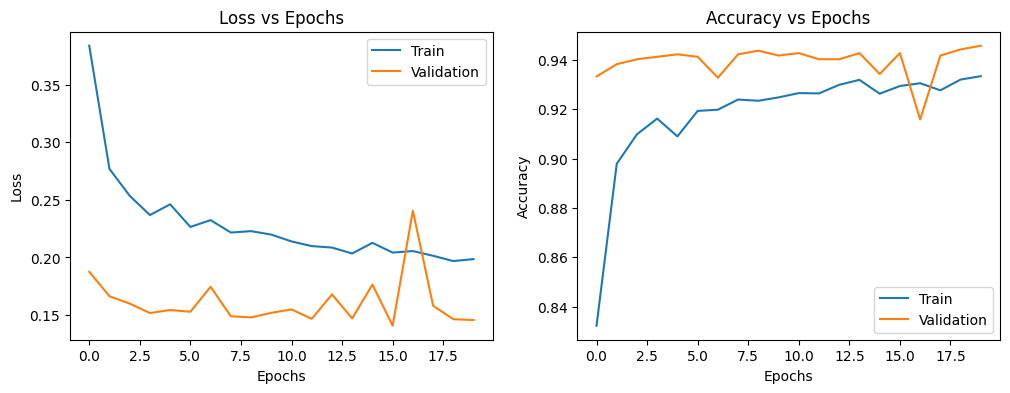

In [ ]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(historyb5.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['accuracy'], label="Train")
ax.plot(epochs, frame['val_accuracy'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()